<a href="https://colab.research.google.com/github/cynthiatcelorio/ML_Clustering/blob/main/cynthia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# librerias
from glob import glob
import matplotlib.pyplot as plt
from skimage import color
from skimage.color import rgb2gray
from skimage.io import imshow, imread
from clustimage import Clustimage
import numpy as np


import cv2
from natsort import natsorted 
from skimage import io

Clonamos el repositorio y creamos variables para guardar las rutas que vamos a utilizar a lo largo de la práctica

In [70]:
!git clone "https://github.com/cynthiatcelorio/ML_Clustering_Data.git"

ruta_train = "/content/ML_Clustering_Data/train"
ruta_test = "/content/ML_Clustering_Data/test"
imagenes_numeros = "/content/ML_Clustering_Data/numeros"                        # Esta carpeta finalmente no la usaremos, posteriormente explicaremos cual era su finalidad en "Procesamientos de imágenes fallidos"

fatal: destination path 'ML_Clustering_Data' already exists and is not an empty directory.


In [71]:
# Creamos un array con las rutas de las difetentes imágenes ordenadas alfabéticamente

train_images = glob('/content/ML_Clustering_Data/train/*')                
train_images = natsorted(train_images)

### Preprocesamiento de las imágenes de entrenamiento

In [46]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ahora vamos a crear una lista de las diferentes rutas de las imágenes a procesar y ordenamos alfabéticamente

In [47]:
from imutils import paths
import cv2

imagePaths = list(paths.list_images(ruta_train))          
imagePaths = natsorted(imagePaths)                        # Ordenamos alfabeticamente

Ahora vamos a crear un array para guardar los ids de las distintas cartas en orden, para posteriormente poder hacer el documento .csv de la entrega

In [48]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético (lo mismo de más arriba)
import glob, os

train_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/train/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    train_img_num.append(file) 

train_img_num = natsorted(train_img_num)

In [49]:
# Comprobamos que coinciden los numeros con el nombre de la imagen 

print(imagePaths[7888])
print(train_img_num[7888])

/content/ML_Clustering_Data/train/8154.jpg
8154


Creamos un arrray para guardar las imágenes que vamos a usar ya procesadas y otro para las mismas imágenes, pero recortadas por la esquina superior izquierda

In [50]:
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA, IncrementalPCA

# Creamos distintos arrays para guardar las imágenes según el procesamiento que les queremos dar
                                          
imagen_normalizada = []                                 # En este array meteremos las imágenes normalizadas sin recortar
cropped = []                                            # En este array meteremos las imágenes normalizadas recortadas
image_pca_train = []                                    # En este array meteremos las imágenes normalizadas y recortadas después de hacer uso de PCA

for imagePath in imagePaths:
    image = cv2.imread(imagePath)                                                 # leemos la imagen
    resized = cv2.resize(image, (224, 224))                                       # le ponemos tamaño 224x224 para tenerlas toda iguales
    image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)                                # la ponemos en grises
    norm_img = np.zeros((300, 300))                                               # normalizamos la imagen
    norm_img = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
    
    cropped_image_train = norm_img[27:110, 0:90]                                  # creamos una variable para la imagen procesada para meterla en PCA

    # Añadimos las imágenes a sus arrays

    imagen_normalizada.append(norm_img)
    cropped.append(norm_img[27:110, 0:90])  


    # -------------------- PCA ---------------------

'''
    pca = PCA()   
    pca.fit(cropped_image_train)

    # Getting the cumulative variance

    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

    # How many PCs explain 95% of the variance?
    k = np.argmax(var_cumu>95)
    print("Number of components explaining 95% variance: "+ str(k))

    plt.figure(figsize=[10,5])
    plt.title('Cumulative Explained Variance explained by the components')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=95, color="r", linestyle="--")
    ax = plt.plot(var_cumu)


    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(cropped_image_train))

    # Plotting the reconstructed image
    plt.imshow(image_recon,cmap = plt.cm.gray)


    image_pca_train.append(image_recon)


'''



 

'''
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))        # Con esto de abajo la ponemos prácticamente en dos tonos de colores
    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(image, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
    images_entrenamiento.append(out_binary)                     # Añadimos la imagen procesada a la lista
    #cropped.append(out_binary[30:100, 0:90])                    # Añadimos la imagen recortada a la lista cropped
'''


'\n    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))        # Con esto de abajo la ponemos prácticamente en dos tonos de colores\n    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)\n    out_gray=cv2.divide(image, bg, scale=255)\n    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] \n    images_entrenamiento.append(out_binary)                     # Añadimos la imagen procesada a la lista\n    #cropped.append(out_binary[30:100, 0:90])                    # Añadimos la imagen recortada a la lista cropped\n'

Finalmente no utiliazmos PCA, porque además de darnos peor resultado, a veces el código no compilaba y otras sí

In [68]:
# plt.imshow(image_pca_train[1653]) 

Aquí podemos ver una imagen normalizada

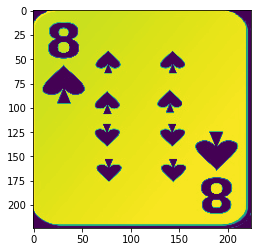

In [52]:
plt.imshow(imagen_normalizada[1653])

Aquí podemos ver esa misma imagen recortada por la esquina superior izquierda. Hemos probado con varios ejemplos de imágenes para ver si eran visibles los palos de las cartas o si había información que estropeara el modelo. Según ello hemos ido aumentado o disminuido el tamaño y posición del recorte.

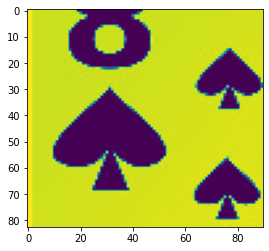

In [53]:
plt.imshow(cropped[1653])

Otro ejemplo:

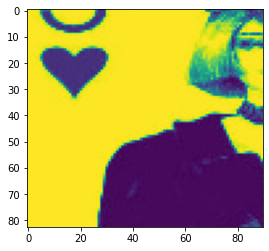

In [54]:
plt.imshow(cropped[555])

### Preprocesamiento de las imágenes (TEST) (Igual que el de train)

In [55]:
from imutils import paths
import cv2

imagePaths = list(paths.list_images(ruta_test))
imagePaths = natsorted(imagePaths)

In [56]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético
import glob, os

test_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/test/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    test_img_num.append(file) 

test_img_num = natsorted(test_img_num)

In [57]:
from google.colab.patches import cv2_imshow
images_entrenamiento_test = []
imagen_normalizada_test = []
cropped_test = []
for imagePath in imagePaths:
    image = cv2.imread(imagePath)                                  # leemos la imagen
    resized = cv2.resize(image, (224, 224))                        # le ponemos tamaño 224x224 para tenerlas toda iguales
    image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)                 # la ponemos en grises

    norm_img = np.zeros((300, 300))                                # normalizamos la imagen
    norm_img = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
    imagen_normalizada_test.append(norm_img)
    cropped_test.append(norm_img[27:110, 0:90])                    # Añadimos la imagen recortada a la lista cropped

'''
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))        # Con esto de abajo la ponemos prácticamente en dos tonos de colores
    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(image, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
    images_entrenamiento_test.append(out_binary)                     # Añadimos la imagen procesada a la lista
    #cropped.append(out_binary[30:100, 0:90])                    # Añadimos la imagen recortada a la lista cropped
'''

'\n    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))        # Con esto de abajo la ponemos prácticamente en dos tonos de colores\n    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)\n    out_gray=cv2.divide(image, bg, scale=255)\n    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] \n    images_entrenamiento_test.append(out_binary)                     # Añadimos la imagen procesada a la lista\n    #cropped.append(out_binary[30:100, 0:90])                    # Añadimos la imagen recortada a la lista cropped\n'

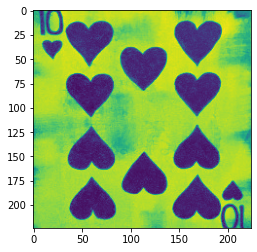

In [58]:
from skimage import io
#io.imshow(images_entrenamiento[555])

plt.imshow(imagen_normalizada_test[22])


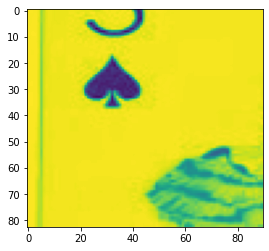

In [59]:
#io.imshow(cropped[555])

plt.imshow(cropped_test[55])


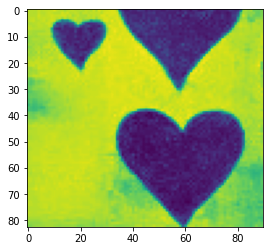

In [60]:
plt.imshow(cropped_test[22])

### Preprocesamientos de imágenes fallidos (No implementado, sólo pruebas que no hemos llegado a utilizar)

#### Separar la imagen en dos clusters

Antes de extraer características de las imágenes, tenemos que llevar a cabo un preprocesamiento para poder comparar las imágenes en lo referente a color y valor.

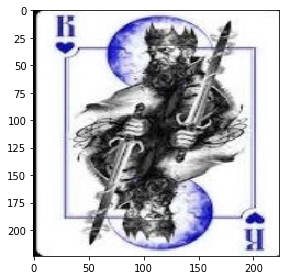

In [74]:
import cv2

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cv2.imread(train_images[i]) 
    images_entrenamiento.append(img)

io.imshow(images_entrenamiento[7])

Aquí hicimos un intento en el que separábamos las imágenes en dos clusters para que así fuera más visible. Finalmente no fuimos capaces de llevar esto a más y aplicarlo a todas las imágenes, así que terminamos descartando esta opción.

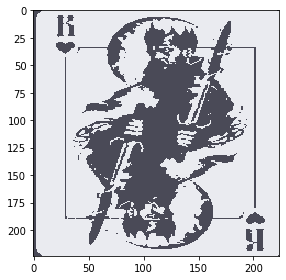

In [73]:
# Hacemos dos clusters con SKMEANS  (?) y así lo separamos mayoritariamente entre el fondo de la carta y el dibujo

img = images_entrenamiento[7]

img2 = img.reshape((-1, 3))
img2 = np.float32(img2)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Clusters
k=2

attempts = 10
ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
from sklearn.cluster import KMeans

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imwrite("aaaa.jpg", res2)

io.imshow(res2)

#### Reconocimiento y eliminación de números

Este código de abajo es un intento de subir una imagen de cada número y que por cada imagen busque ese número y lo ponga en blanco, así en la esquina recortada solo quedaría la imagen del palo y restos y nos quitaríamos el número de encima.
Finalmente lo descartamos porque era inviable.

Los números los detectaba algo bien en la carta, pero era complicado elegir qué imagén de qué número aplicar a cada situación.

Había algo más de código, pero lo borramos porque es tedioso. La idea principal era la comentada arriba.

In [75]:
''' import cv2
import numpy as np

def  maintain_aspect_ratio_resize(image,  width=None,  height=None,  inter=cv2.INTER_AREA):
     dim =  None
     (h, w)  = image.shape[:2]
     if width is  None  and height is  None:
        return image

     if width is  None:
        r = height /  float(h)
        dim =  (int(w * r), height)
     else:
          r = width /  float(w)
          dim =  (width,  int(h * r))

          return cv2.resize(image, dim,  interpolation=inter)


template = cv2.imread('/content/ML_Clustering_Data/numeros/num4.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template,  50,  200)
(tH, tW)  = template.shape[:2]
cv2_imshow(template)

original_image = cv2.imread(imagePaths[1601])
final = original_image
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
found =  None

for scale in np.linspace(0.2,  1.0,  20)[::-1]:
     resized = maintain_aspect_ratio_resize(gray,  width=int(gray.shape[1]  * scale))
     r = gray.shape[1]  /  float(resized.shape[1])

     if resized.shape[0]  < tH or resized.shape[1]  < tW:
        break
     canny = cv2.Canny(resized,  50,  200)    
     detected = cv2.matchTemplate(canny, template, cv2.TM_CCOEFF)
     (_, max_val, _, max_loc)  = cv2.minMaxLoc(detected)

     
     if found is  None  or max_val > found[0]:
        found =  (max_val, max_loc, r)

(_, max_loc, r)  = found
(start_x, start_y)  =  (int(max_loc[0]  * r),  int(max_loc[1]  * r))
(end_x, end_y)  =  (int((max_loc[0]  + tW)  * r),  int((max_loc[1]  + tH)  * r))



cv2.rectangle(original_image,  (start_x, start_y),  (end_x, end_y),  (0,250,0),  2)
cv2_imshow(original_image)

cv2.rectangle(final,  (start_x, start_y),  (end_x, end_y),  (255,255,255),  -1)
cv2.imwrite('final.png', final)
cv2.waitKey(0)


'''

error: ignored

## Entrenamiento de modelos

Se entrenarán varios modelos y se compararán utilizando varias medidas que se basan en distancia entre clusters, principalmente silhouette_score.


Vectorización de los datos para el modelo

Consiste en reducir los datos a arrays unidimensionales para poder pasarlos como parámetro al modelo. Esto se hace mediante el método ravel visto en clase.

In [61]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=5, n_init=10, max_iter=1000, random_state=42)

# inicializar listas
cropped_flat = []
cropped_flat_test = []

# rellenar de imagenes vectorizadas
for i in range(0, len(cropped)):               
    img = cropped[i].ravel()
    cropped_flat.append(img)

for i in range(0, len(cropped_test)):
    img = cropped_test[i].ravel()
    cropped_flat_test.append(img)

### Pruebas con KMeans

In [62]:
kmeans_model = km.fit(cropped_flat_test)
km_centroids = km.cluster_centers_
km_centroids.shape

(5, 7470)

In [63]:
y = km.predict(cropped_flat_test)

Obtenemos las métricas, principalmente centradas en la distancia entre clusters e inter-cluster.

In [64]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

CH = calinski_harabasz_score(cropped_flat_test, y)
DB = davies_bouldin_score(cropped_flat_test, y)
silhouette_avg = silhouette_score(cropped_flat_test, y)

print(silhouette_avg)
print(CH)
print(DB)

0.12597588448569602
46.824622818850834
2.1433156529423294


In [66]:
import numpy
import sys

numpy.set_printoptions(threshold=sys.maxsize)

y

array([3, 0, 3, 3, 0, 1, 1, 0, 1, 0, 2, 4, 0, 3, 1, 3, 2, 2, 0, 3, 1, 1,
       0, 2, 0, 3, 2, 2, 4, 4, 1, 2, 0, 2, 0, 4, 2, 2, 3, 3, 4, 1, 3, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 4, 2, 2, 3, 4, 3, 3, 0, 3, 3,
       4, 0, 3, 0, 2, 0, 2, 1, 1, 3, 0, 3, 4, 0, 0, 0, 0, 1, 1, 3, 0, 3,
       3, 1, 3, 0, 2, 2, 2, 1, 2, 3, 3, 2, 3, 0, 4, 1, 1, 3, 0, 4, 0, 4,
       3, 1, 1, 3, 2, 3, 0, 0, 0, 3, 0, 0, 2, 4, 2, 2, 0, 4, 0, 4, 2, 0,
       0, 3, 3, 3, 2, 0, 1, 0, 4, 2, 0, 3, 0, 0, 1, 2, 2, 4, 0, 1, 3, 2,
       0, 4, 0, 2, 0, 2, 2, 4, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 4, 2, 3, 1, 2, 3, 0, 0, 3, 4, 2, 3, 1, 3, 3, 4, 0, 1, 0,
       2, 4, 0, 2, 0, 2, 4, 1, 0, 1, 0, 0, 4, 0, 0, 1, 1, 3, 4, 3, 0, 2,
       2, 2, 2, 4, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 2, 4, 4, 0, 2, 3, 2, 1,
       3, 2, 1, 0, 1, 1, 0, 0, 0, 2, 4, 0, 2, 2, 2, 0, 4, 0, 2, 2, 2, 3,
       2], dtype=int32)

Efectivamente, se divide en 5 clusters distintos el conjunto de datos.

In [67]:
print(np.unique(y))

[0 1 2 3 4]


Ahora, se prueba a optimizar el modelo mediante un gridsearch:

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

param_grid = {
    'random_state' : [42],
    'max_iter' : [500, 1000, 200],
    'copy_x' : [True, False],
    'algorithm' : ['lloyd', 'elkan', 'auto', 'full'],
}


gs2 = RandomizedSearchCV(estimator=km,
                             param_distributions=param_grid,
                             n_iter=5,
                             n_jobs=4,
                             verbose=1)
gs2.fit(cropped_flat)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: ignored

In [ ]:
print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: -54599030422.86867
Best score: {'random_state': 42, 'max_iter': 1000, 'copy_x': True, 'algorithm': 'full'}


In [25]:
km_second = KMeans(init="random", n_clusters=5, n_init=10, random_state=42, max_iter=1000, copy_x=True, algorithm='full')
kmeans_model = km_second.fit_transform(cropped_flat_test)

km_centroids = km_second.cluster_centers_
km_centroids.shape

y_second = km_second.predict(cropped_flat_test)

In [26]:
silhouette_avg = silhouette_score(cropped_flat_test, y_second)

print(silhouette_avg)

0.12597588448569602


Los parámetros obtenidos con gridsearch no producen diferencias notables en el desempeño del modelo.

In [27]:
print(np.unique(y))

[0 1 2 3 4]


### Pruebas con DBSCAN

Ahora se prueba el algoritmo DBSCAN para la clasificación de las imágenes. Se seguirá el mismo procedimiento que con KMeans, optimizando con gridsearch.

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(cropped_flat_test)
print(np.unique(clustering.labels_))

[-1]


Este modelo está creando un único cluster, por lo que no nos sirve y es imposible calcular distancias entre clusters al haber sólo uno.


### Pruebas con GaussianMixture

In [160]:
from sklearn.mixture import GaussianMixture

gaussian_model = GaussianMixture(n_components=5, random_state = 42)

gaussian_model.fit(cropped_flat)                                     # dataset entrenamiento
prediccion = gaussian_model.fit_predict(cropped_flat_test)           # dataset test


silhouette_avg = silhouette_score(cropped_flat_test, prediccion)
print(silhouette_avg)

0.10921812765861559


In [161]:
print(np.unique(prediccion))

[0 1 2 3 4]


In [165]:
print(silhouette_avg)

0.10921812765861559


La silhouette score no mejora


In [164]:
prediccion

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 4, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 4, 4, 2, 2, 1, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 3, 1, 1, 1, 2, 2,
       4, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 4, 1, 4,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 1, 4, 1, 4, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 4, 1, 2, 1, 2,
       1, 0, 1, 2, 1, 2, 2, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 4, 2, 2, 0, 2, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1, 0, 2, 2, 1,
       2, 3, 1, 2, 1, 2, 4, 2, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 4, 1, 1, 2,
       2, 2, 2, 4, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 4, 1, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 2, 2, 2, 1, 3, 1, 2, 2, 2, 1,
       2])

### Conclusión

En conclusión, utilizaremos KMeans porque da el mejor resultado de todas las pruebas en cuanto a distancia entre clusters.

Por problemas con el notebook, la mejor submission no coincide con el resultado de este notebook. Esto es debido a que inicialmente nos equivocamos y entrenamos mal el modelo pasándole al entrenamiento los datos del Test y no los del Train. Después de esta corrección el resultado empeoró.

Por otro lado, la última submission que hemos hecho la hicimos haciendo uso de PCA, que después nos dio problemas a la hora de compilar, así que hemos terminado quitándolo del código para que no surjan estos problemas.

Al ser la última submission que teníamos permitida hacer hoy, no hemos podido subir otra para terminar marcándola como la submission elegida para la competición. Así que no hemos podido elegir otra de las que teníamos puesto que ya teníamos imposible qué submission correspondía a qué entrenamiento.


## Otros

In [24]:
import pandas as pd

submission = pd.DataFrame()
submission['id'] = test_img_num
submission['suit'] = y

submission.to_csv("submission_grupo24.csv", index=False)
from google.colab import files
files.download('submission_grupo24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Fuentes

Ajustes básicos de imágenes (Escala de grises, rotar y recortar)

https://www.youtube.com/watch?v=uDNqNv2N-pY&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=19

Image segmentation

https://www.youtube.com/watch?v=6CqRnx6Ic48&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=52

Edición de imagen que hemos utilizado

https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python

Girar imágenes según su contorno

https://stackoverflow.com/questions/64860785/opencv-using-canny-and-shi-tomasi-to-detect-round-corners-of-a-playing-card

Más preprocesamiento de imágenes

https://www.instintoprogramador.com.mx/2020/11/tutorial-de-procesamiento-de-imagenes.html

Borrar texto de una imagen

https://dev.to/stokry/how-to-remove-an-object-from-an-image-with-python-2md9